In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Unnamed: 0,prev_file,filename,cell_type,xmin,xmax,ymin,ymax
0,3070,./BCCD_Dataset/BCCD/JPEGImages/BloodImage_0008...,225.jpg,WBC,257,380,335,456
1,4535,./BCCD_Dataset/BCCD/JPEGImages/BloodImage_0029...,337.jpg,RBC,417,536,373,480
2,4839,./BCCD_Dataset/BCCD/JPEGImages/BloodImage_0040...,360.jpg,RBC,479,583,105,202
3,1348,./BCCD_Dataset/BCCD/JPEGImages/BloodImage_0024...,96.jpg,RBC,214,327,333,438
4,4151,./BCCD_Dataset/BCCD/JPEGImages/BloodImage_0020...,310.jpg,RBC,567,640,193,294


In [3]:
#number of unique training images
train['filename'].nunique()

#Number of output classes
train['cell_type'].value_counts()

RBC          3318
WBC           302
Platelets     291
Name: cell_type, dtype: int64

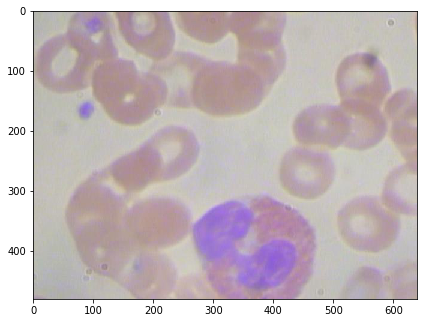

In [4]:
path = './BCCD_Dataset/BCCD/JPEGImages/'
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread(path + 'BloodImage_00160.jpg')
plt.imshow(image)

In [5]:
# iterating over the image for different objects
for _,row in train[train.filename == path+'BloodImage_00160.jpg'].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)